In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Acquire the data
* Identify the "right" data set(s)
* Import data and set up local or remote data structure
* Determine most appropriate tools to work with data

Data downloaded from https://data.gov.sg/dataset/resale-flat-prices 

In [2]:
resale_prices = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-march-2012-onwards.csv')

### 2. Parse the data
* Read any documentation provided with the data
* Perform exploratory data analysis
* Verify the quality of the data

In [3]:
resale_prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [4]:
resale_prices.isnull().values.any()

False

In [5]:
resale_prices.count()

month                  96631
town                   96631
flat_type              96631
block                  96631
street_name            96631
storey_range           96631
floor_area_sqm         96631
flat_model             96631
lease_commence_date    96631
resale_price           96631
dtype: int64

### 3. Mine the Data
* Determine sampling methodology and sample data
* Format, clean, slice, and combine data in Python
* Create necessary derived columns from the data (new data)

In [6]:
resale_prices.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [7]:
resale_prices = resale_prices.rename(columns={'month': 'year-month'})

In [8]:
resale_prices['year'] = resale_prices['year-month'].apply(lambda x: int(x.split("-")[0]))

In [9]:
resale_prices['month'] = resale_prices['year-month'].apply(lambda x: int(x.split("-")[1]))

In [10]:
resale_prices['lower_storey_range'] = resale_prices['storey_range'].apply(lambda x: int(x.split()[0]))

In [11]:
resale_prices['upper_storey_range'] = resale_prices['storey_range'].apply(lambda x: int(x.split()[2]))

In [12]:
resale_prices['flat_age'] = resale_prices['year'] - resale_prices['lease_commence_date']

In [13]:
resale_prices.head()

,year-month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,lower_storey_range,upper_storey_range,flat_age
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,3,6,10,26
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,3,1,5,32
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,3,6,10,32
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,3,1,5,28
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,3,6,10,32


### 4. Refine the Data
* Identify trends and outliers
* Apply descriptive and inferential statistics
* Document and transform data

In [14]:
resale_prices.describe()

,floor_area_sqm,lease_commence_date,resale_price,year,month,lower_storey_range,upper_storey_range,flat_age
count,96631.000000,96631.000000,9.663100e+04,96631.000000,96631.000000,96631.000000,96631.000000,96631.000000
mean,96.570929,1990.219039,4.502107e+05,2014.204003,6.382331,6.843156,8.984684,23.984963
std,24.615748,10.549772,1.298110e+05,1.585023,3.324086,5.149889,5.143670,10.554514
min,31.000000,1966.000000,1.900000e+05,2012.000000,1.000000,1.000000,3.000000,1.000000
25%,74.000000,1983.000000,3.550000e+05,2013.000000,4.000000,4.000000,6.000000,15.000000
50%,95.000000,1988.000000,4.250000e+05,2014.000000,6.000000,7.000000,9.000000,26.000000
75%,111.000000,1999.000000,5.150000e+05,2016.000000,9.000000,10.000000,12.000000,32.000000
max,280.000000,2013.000000,1.180000e+06,2017.000000,12.000000,49.000000,51.000000,51.000000


In [15]:
import matplotlib
matplotlib.style.use('ggplot')

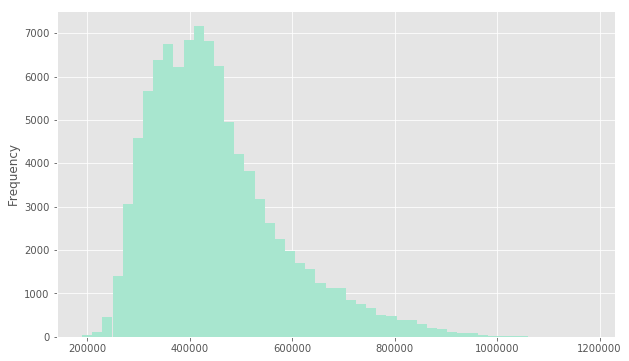

In [16]:
resale_prices['resale_price'].plot(kind="hist", bins=50, figsize=(10,6), color="#a8e6cf")

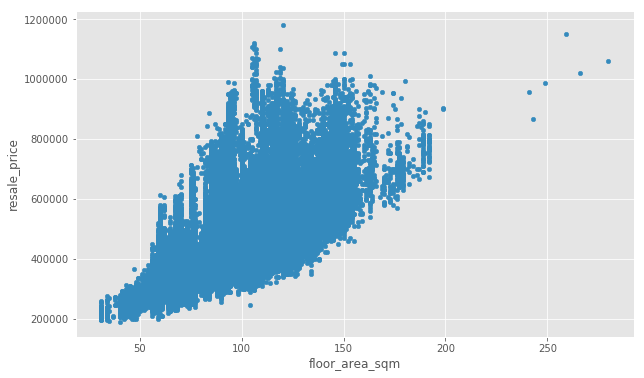

In [17]:
resale_prices.plot('floor_area_sqm', 'resale_price', kind="scatter", figsize=(10,6))

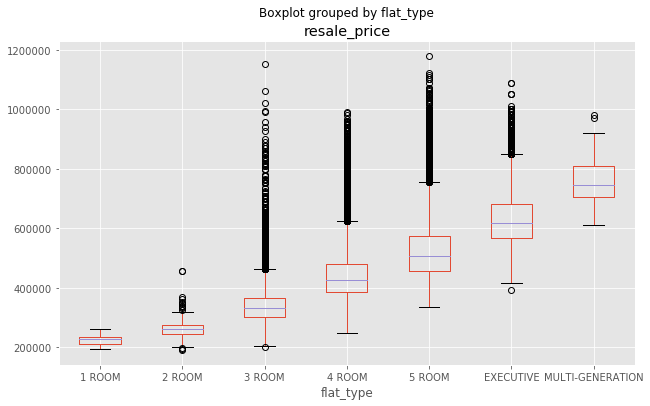

In [18]:
resale_prices.boxplot("resale_price", "flat_type", figsize=(10,6))

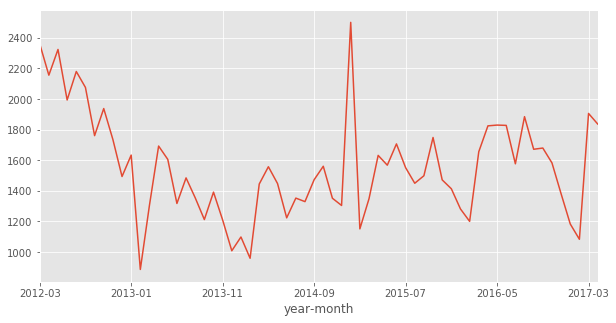

In [19]:
resale_prices.groupby("year-month").count()['flat_model'].plot(figsize=(10,5))

In [20]:
resale_prices.groupby("year-month").count()['flat_model'].sort_values(ascending=False)[:5]

year-month
2015-01    2500
2012-03    2360
2012-05    2323
2012-07    2179
2012-04    2155
Name: flat_model, dtype: int64

### 5. Build a data model
* Select appropriate model
* Build model
* Evaluate and refine model

In [21]:
from sklearn import linear_model

In [22]:
reg = linear_model.LinearRegression()

In [23]:
reg.fit(resale_prices[["floor_area_sqm", "upper_storey_range", "flat_age"]], resale_prices["resale_price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
reg.predict([[50,10,10], [67,5,28]])

array([ 305218.45070752,  315782.87716889])

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
rmse = mean_squared_error(resale_prices["resale_price"], 
                          reg.predict(resale_prices[["floor_area_sqm", "upper_storey_range", "flat_age"]]))**0.5

In [27]:
rmse

84658.318517472144

In [28]:
df_flat_type = pd.get_dummies(resale_prices['flat_type'])

In [29]:
resale_prices = pd.concat([resale_prices, df_flat_type], axis=1)

In [30]:
resale_prices.columns

Index([u'year-month', u'town', u'flat_type', u'block', u'street_name',
       u'storey_range', u'floor_area_sqm', u'flat_model',
       u'lease_commence_date', u'resale_price', u'year', u'month',
       u'lower_storey_range', u'upper_storey_range', u'flat_age', u'1 ROOM',
       u'2 ROOM', u'3 ROOM', u'4 ROOM', u'5 ROOM', u'EXECUTIVE',
       u'MULTI-GENERATION'],
      dtype='object')

In [31]:
reg2 = linear_model.LinearRegression()

In [32]:
factors = ["floor_area_sqm", "upper_storey_range", "flat_age", "1 ROOM", "2 ROOM", "3 ROOM",
                       "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]

In [33]:
reg2.fit(resale_prices[factors], resale_prices["resale_price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
rmse2 = mean_squared_error(resale_prices["resale_price"], 
                          reg2.predict(resale_prices[factors]))**0.5

In [35]:
rmse2

83900.551785328178

In [36]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='resale_price ~ floor_area_sqm + upper_storey_range + flat_age + C(flat_type)', data=resale_prices).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Fri, 02 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:26:44   Log-Likelihood:            -1.2327e+06
No. Observations:               96631   AIC:                         2.465e+06
Df Residuals:                   96621   BIC:                         2.465e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                         1.213e+05   1.13e+04     10.700      0.000      9.91e+04  1.44e+05
C(flat_type)[T.2 ROOM]           -3989.2959   1.15e+04     -0.346      0.729     -2.66e+04  1.86e+04
C(flat_type)[T.3 ROOM]            2.059e+04   1.13e+04      1.822      0.069     -1563.612  4.27e+04
C(flat_type)[T.4 ROOM]            5.124e+04   1.15e+04      4.463      0.000      2.87e+04  7.37e+04
C(flat_type)[T.5 ROOM]            7.944e+04   1.17e+04      6.799      0.000      5.65e+04  1.02e+05
C(flat_type)[T.EXECUTIVE]         1.325e+05    1.2e+04     11.062      0.000      1.09e+05  1.56e+05
C(flat_type)[T.MULTI-GENERATION]  2.437e+05   2.04e+04     11.931      0.000      2.04e+05  2.84e+05
floor_area_sqm                    2294.8872     35.220     65.159      0.000      2225.857  2363.917
upper_storey_range                7232.8709     54.296    133.211      0.000      7126.451  7339.291
flat_age                          -525.5948     32.061    -16.394      0.000      -588.433  -462.756
==============================================================================
Omnibus:                    22149.656   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53422.771
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""